# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as po

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Reading the Data

In [2]:
data = pd.read_csv("dataset.csv")
data.describe(include = 'all')
df = data.apply(lambda x: x.astype(str).str.lower())
df.drop(['URL','WHOIS_REGDATE','WHOIS_UPDATED_DATE'],axis = 1,inplace = True)

In [3]:
df.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,none,none,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,utf-8,apache/2.4.10,15087.0,none,none,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,microsoft-httpapi/2.0,324.0,none,none,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,iso-8859-1,nginx,162.0,us,ak,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,utf-8,none,124140.0,us,tx,57,2,5,4278,61,62,129889,4586,61,4.0,0


Type 1 - Malicious and Type 0 - Benign

# Preprocessing

In this preprocessing, we convert the dataset into it's required format and then process the null values.

In [4]:
categorical_columns = ['CHARSET','SERVER','WHOIS_COUNTRY','WHOIS_STATEPRO']
#The server version are not considered just their name
df['SERVER'] = df['SERVER'].str.split("/",expand = True) 
df['SERVER'] = df['SERVER'].str.split("-",expand = True) 
                                                                                       
df.replace(to_replace=['none'], value=np.nan, inplace=True)

numerical_columns = list(set(df.columns) - set(categorical_columns) - set(['WHOIS_REGDATE','WHOIS_UPDATED_DATE']))
for i in numerical_columns:
    df[i] = df[i].astype('float')
    
print(df.isnull().sum())

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       175
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               363
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


In [5]:
df.dropna(axis = 0,how = 'any',inplace = True)
for i in categorical_columns:
    df[i] = df[i].astype("category")
    df[i] = df[i].cat.codes


In [6]:
df

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
3,17.0,6.0,0,31,162.0,30,4,31.0,22.0,3.0,3812.0,39.0,37.0,18784.0,4380.0,39.0,8.0,0.0
6,18.0,6.0,0,3,345.0,30,19,12.0,0.0,3.0,1189.0,14.0,13.0,8559.0,1327.0,14.0,2.0,0.0
7,19.0,6.0,1,15,324.0,30,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,20.0,6.0,1,15,324.0,30,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,21.0,7.0,0,31,686.0,23,68,6.0,0.0,2.0,603.0,8.0,9.0,1580.0,745.0,8.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,143.0,22.0,0,1,374.0,30,23,6.0,5.0,2.0,564.0,6.0,7.0,442.0,564.0,6.0,0.0,0.0
1762,146.0,24.0,2,31,11833.0,30,9,29.0,20.0,8.0,4167.0,33.0,33.0,3181.0,4499.0,33.0,4.0,0.0
1774,183.0,29.0,0,15,4890.0,30,71,22.0,2.0,7.0,2062.0,30.0,26.0,8161.0,2742.0,30.0,8.0,0.0
1778,201.0,34.0,2,3,8904.0,30,27,83.0,2.0,6.0,6631.0,87.0,89.0,132181.0,6945.0,87.0,4.0,0.0


# Data Visualisation 

In [7]:
#For now let's visualise the distribution and countplots of every column
"""
for i in df.columns:
    plt.figure()
    if(df[i].dtype == 'float64'):
        sns.distplot(df[i])
    else:
        sns.countplot(df[i]).set_title(i)
        """

"\nfor i in df.columns:\n    plt.figure()\n    if(df[i].dtype == 'float64'):\n        sns.distplot(df[i])\n    else:\n        sns.countplot(df[i]).set_title(i)\n        "

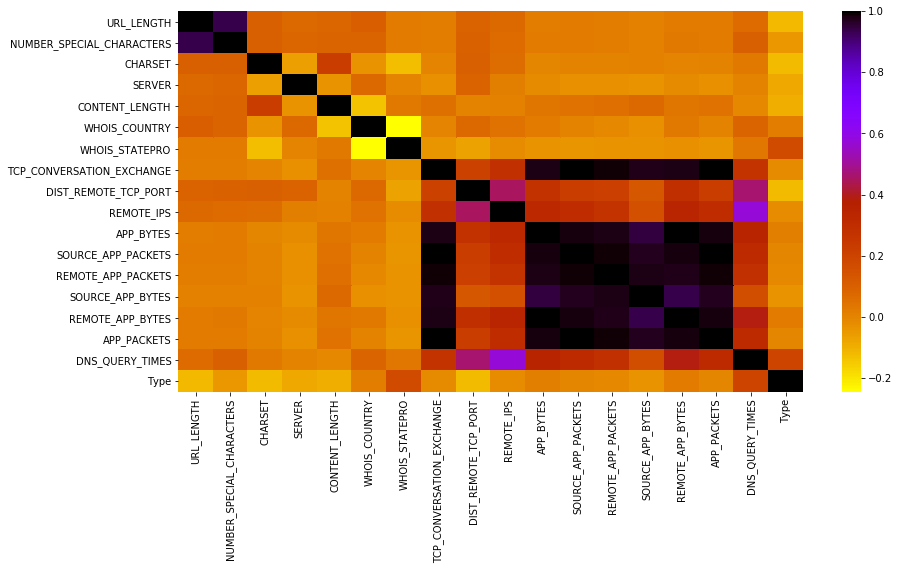

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),cmap='gnuplot_r')

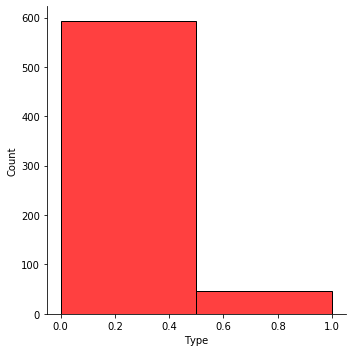

In [9]:
sns.displot(data = df,x='Type',bins=2,color='red')

In [10]:
print(df['Type'].value_counts())

0.0    593
1.0     46
Name: Type, dtype: int64


In [11]:
y = df['Type']
X = df.drop('Type',axis=1)

# Random Over Sampling

In [12]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X,y)
X_over_sampled,y_over_sampled = ros.fit_resample(X,y)

In [13]:
print("Benign: ",y_over_sampled[y_over_sampled==0].value_counts())
print("Malicious: ",y_over_sampled[y_over_sampled==1].value_counts())

Benign:  0.0    593
Name: Type, dtype: int64
Malicious:  1.0    593
Name: Type, dtype: int64


# SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

r_smote = SMOTE(random_state =0)
r_smote.fit(X,y)
X_smote,y_smote = r_smote.fit_resample(X,y)
X_smote['type'] = y_smote

In [15]:
print("Benign: ",y_smote[y_smote==0].value_counts())
print("Malicious: ",y_smote[y_smote==1].value_counts())

Benign:  0.0    593
Name: Type, dtype: int64
Malicious:  1.0    593
Name: Type, dtype: int64


# ADASYN

In [16]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state =0,sampling_strategy = 'auto')
adasyn.fit(X,y)
X_adasyn,y_adasyn = adasyn.fit_resample(X,y)

In [17]:
print("Benign: ",y_adasyn[y_adasyn==0].value_counts())
print("Malicious: ",y_adasyn[y_adasyn==1].value_counts())

Benign:  0.0    593
Name: Type, dtype: int64
Malicious:  1.0    591
Name: Type, dtype: int64


# SMOTE + TOMEK Links (Combination of Oversampling and Undersampling)

In [18]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state =0,sampling_strategy = 'auto')
smote_tomek.fit(X,y)
X_smote_tomek,y_smote_tomek = smote_tomek.fit_resample(X,y)

In [19]:
print("Benign: ",y_smote_tomek[y_smote_tomek==0].value_counts())
print("Malicious: ",y_smote_tomek[y_smote_tomek==1].value_counts())

Benign:  0.0    588
Name: Type, dtype: int64
Malicious:  1.0    588
Name: Type, dtype: int64


# Analysis of Sampled Data

## Analysing SMOTE

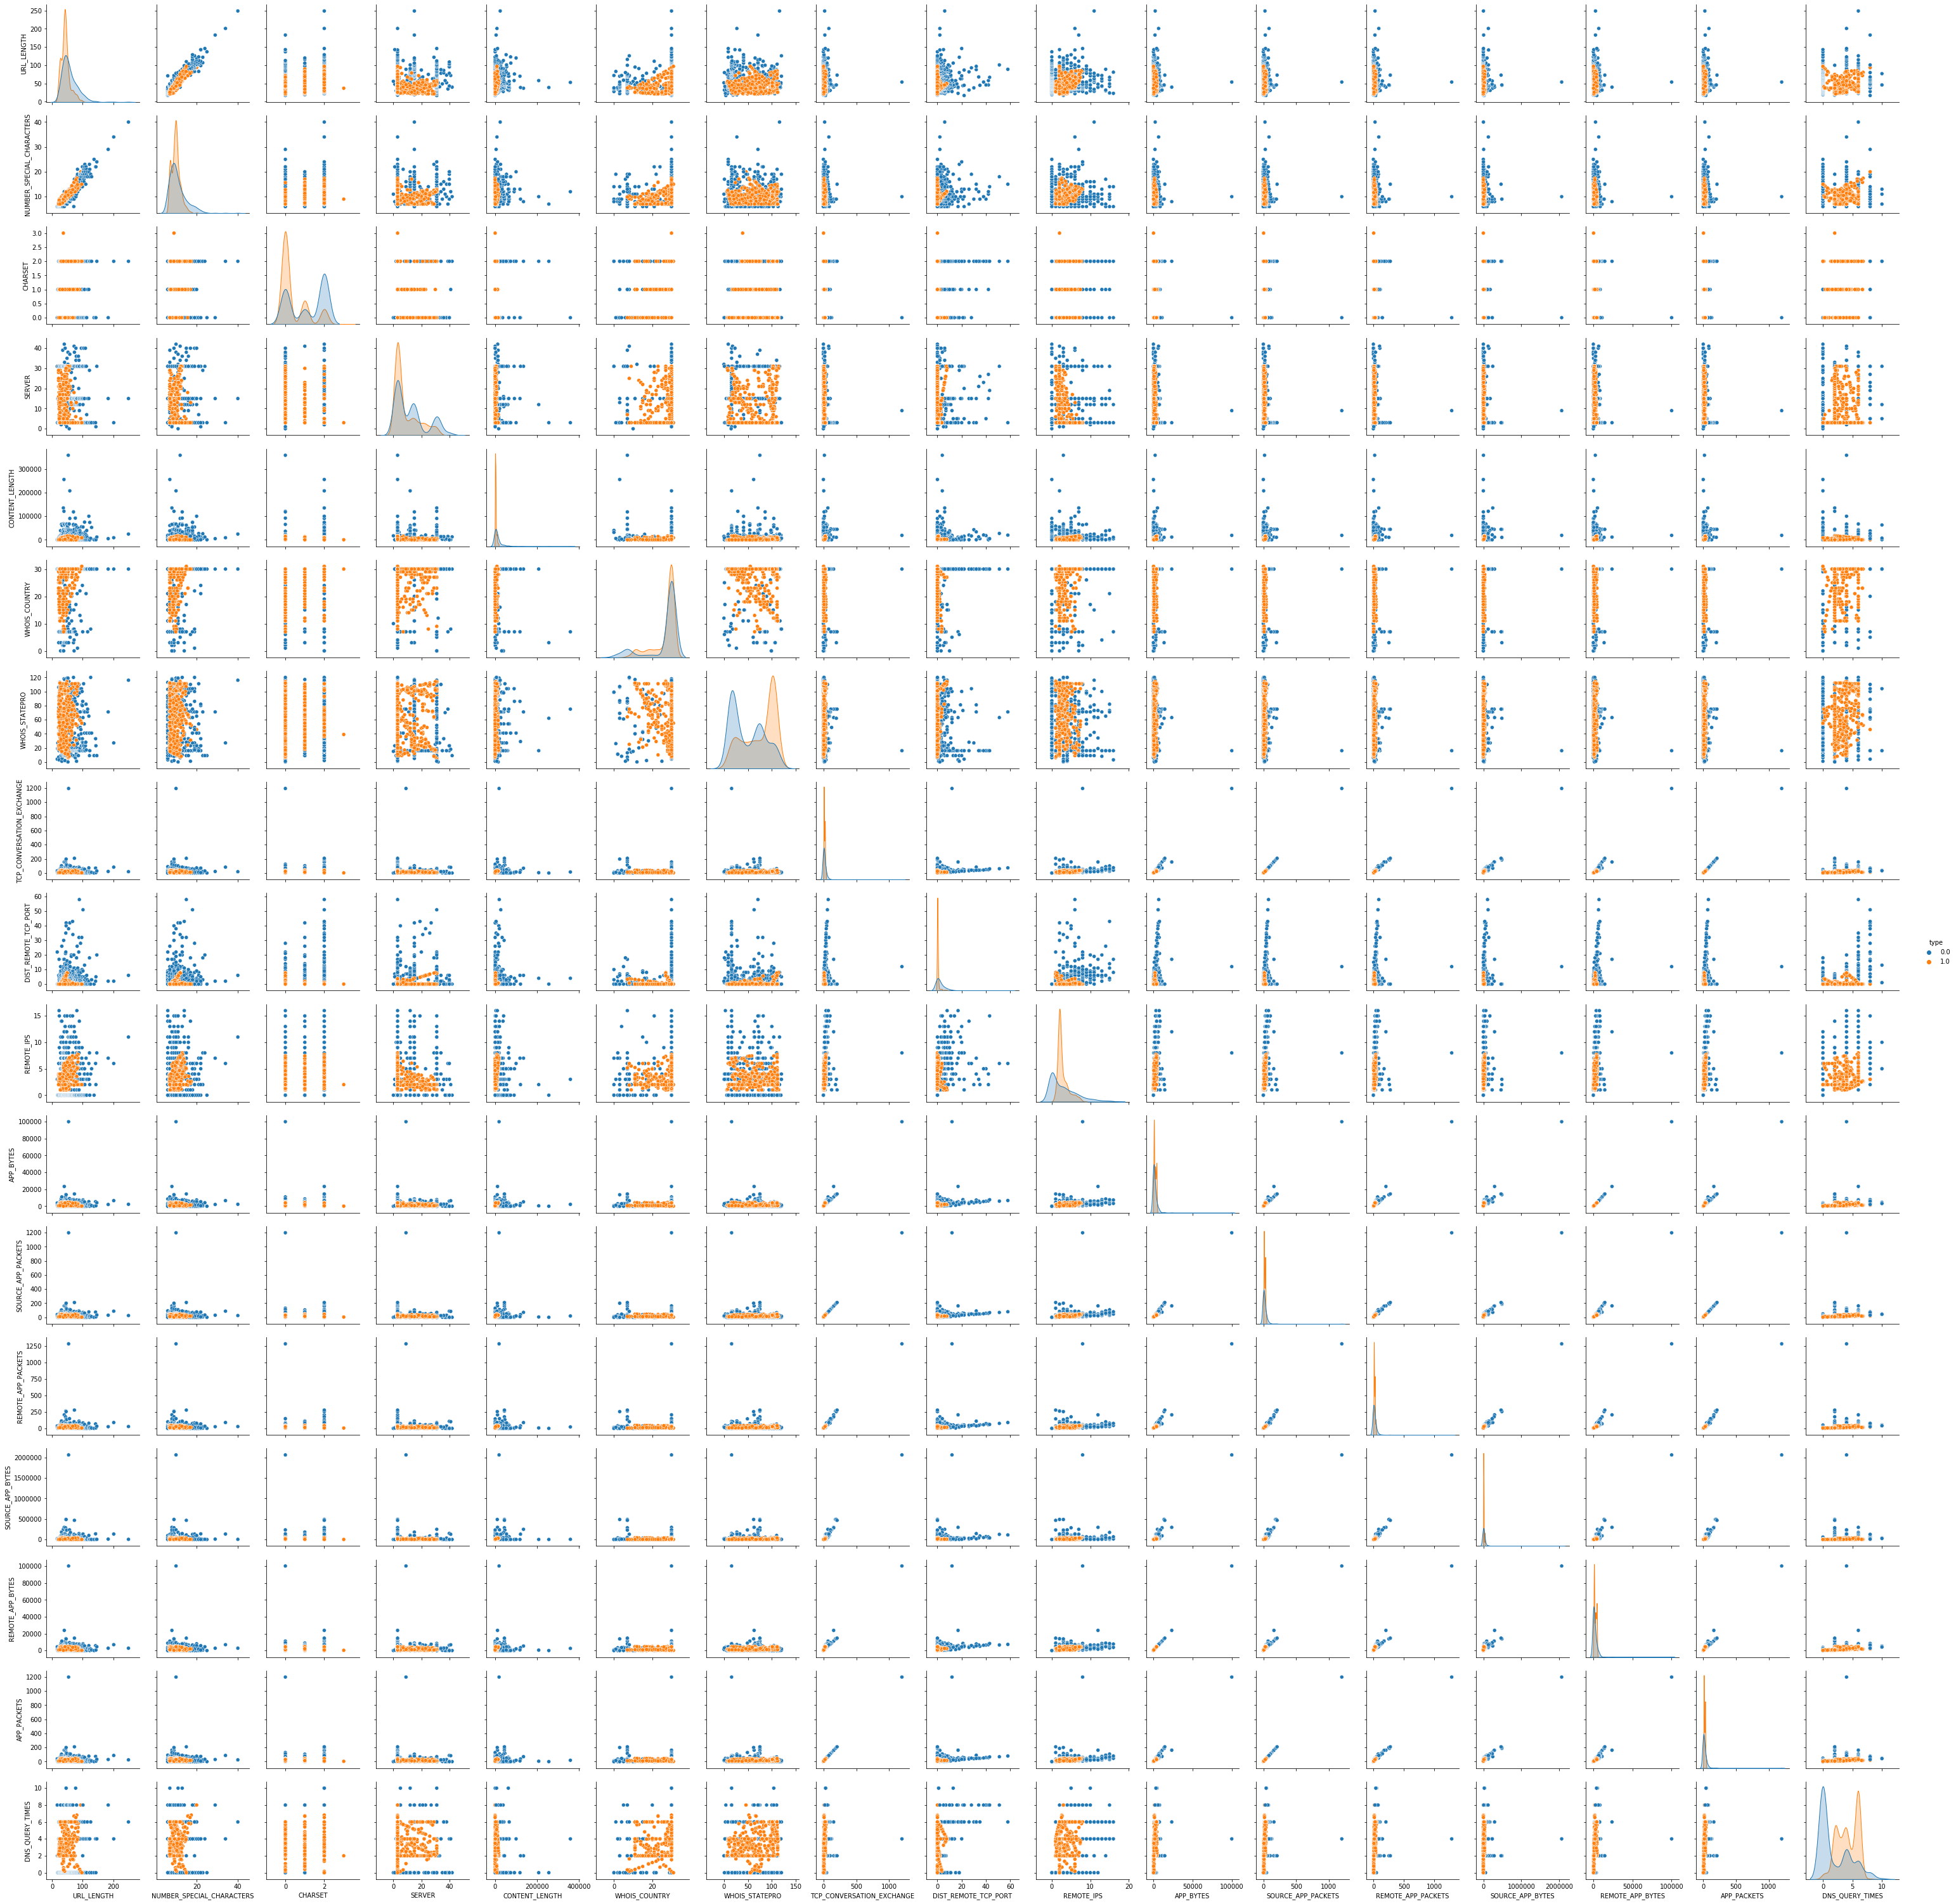

In [20]:
#X_over_sampled,y_over_sampled
sns.pairplot(X_smote, height=2.5,hue = 'type');

## Numerical Datatype

## URL_LENGTH 

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



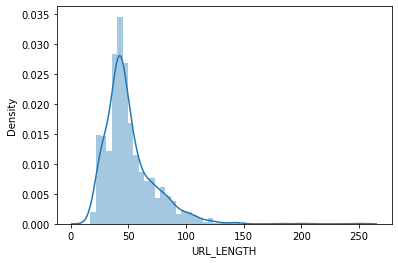

In [21]:
sns.distplot(X_smote['URL_LENGTH'])

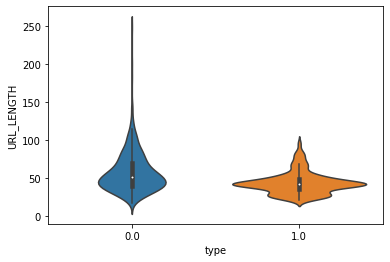

In [22]:
sns.violinplot(x="type", y="URL_LENGTH", data=X_smote)

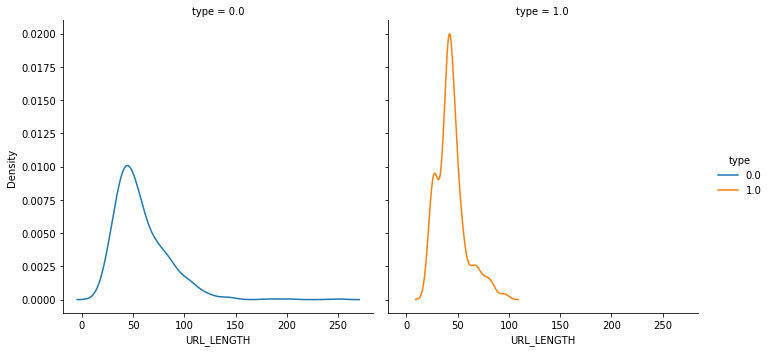

In [23]:
sns.displot(x="URL_LENGTH",col = 'type',hue = 'type',kind = 'kde',data = X_smote)

## Number Special Character 

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



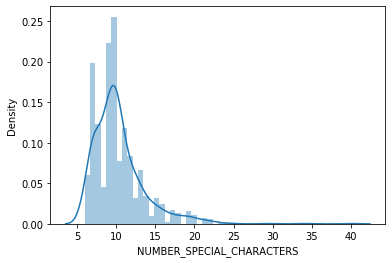

In [24]:
sns.distplot(X_smote['NUMBER_SPECIAL_CHARACTERS'])

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



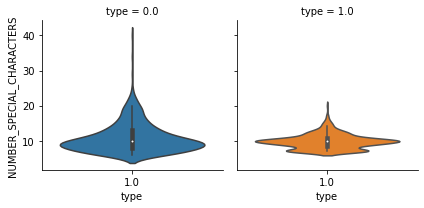

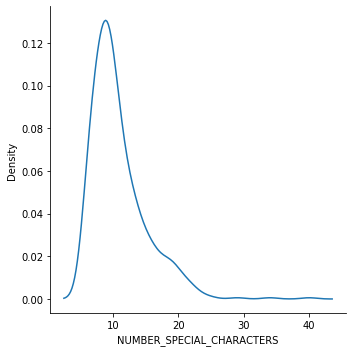

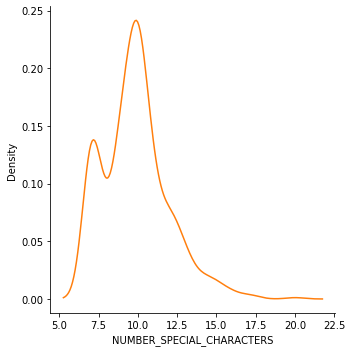

In [25]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"NUMBER_SPECIAL_CHARACTERS",kind = 'kde')
plt.map(sns.violinplot,"type","NUMBER_SPECIAL_CHARACTERS")


## Content Length

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



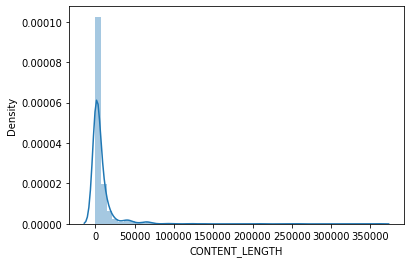

In [27]:
sns.distplot(X_smote['CONTENT_LENGTH'])



C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



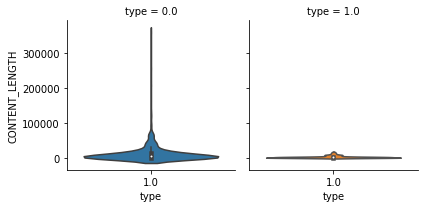

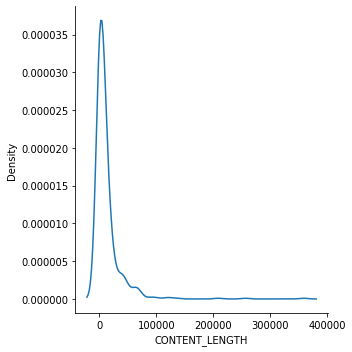

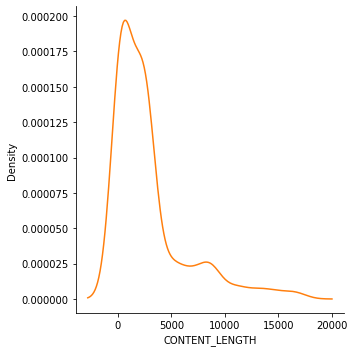

In [28]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"CONTENT_LENGTH",kind = 'kde')
plt.map(sns.violinplot,"type","CONTENT_LENGTH")

## TCP CONVERSATION Exchange

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



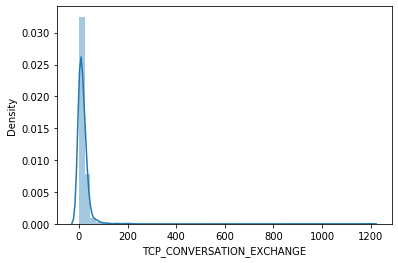

In [29]:
sns.distplot(X_smote['TCP_CONVERSATION_EXCHANGE'])



C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



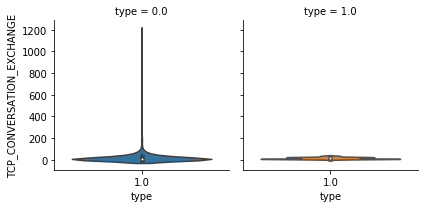

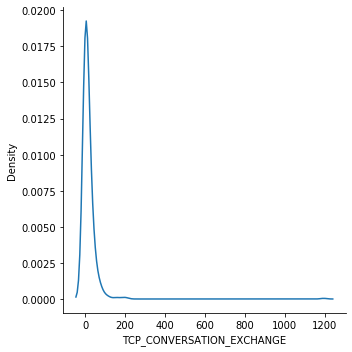

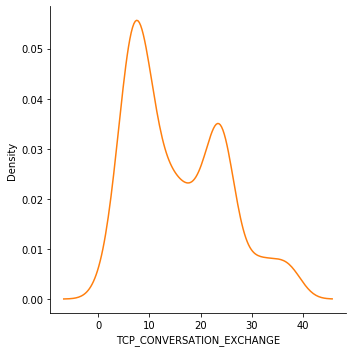

In [30]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"TCP_CONVERSATION_EXCHANGE",kind = 'kde')
plt.map(sns.violinplot,"type","TCP_CONVERSATION_EXCHANGE")

## Dist Remote TCP Port

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



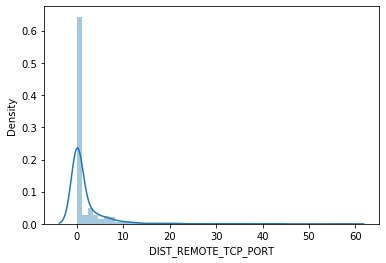

In [31]:
sns.distplot(X_smote['DIST_REMOTE_TCP_PORT'])



C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



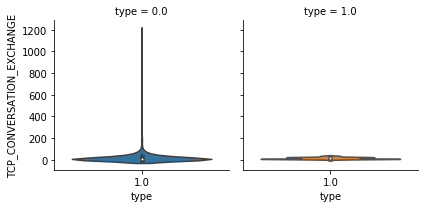

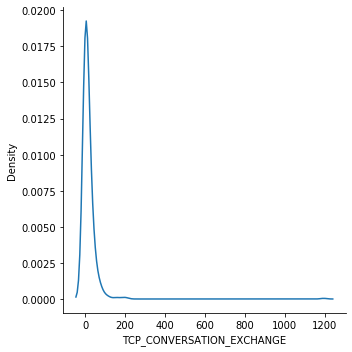

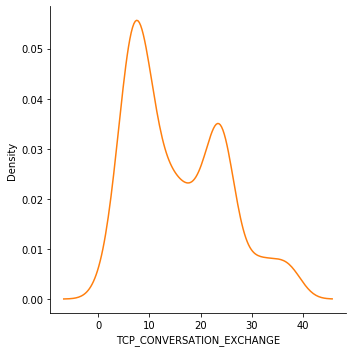

In [32]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"TCP_CONVERSATION_EXCHANGE",kind = 'kde')
plt.map(sns.violinplot,"type","TCP_CONVERSATION_EXCHANGE")

In [314]:
X_smote.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'type'],
      dtype='object')

## Remote IPS

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



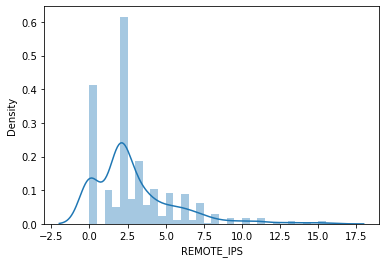

In [34]:
sns.distplot(X_smote['REMOTE_IPS'])



C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



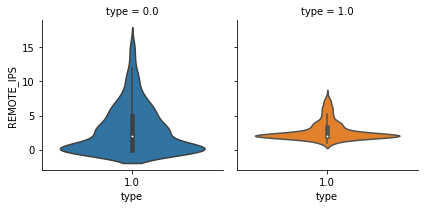

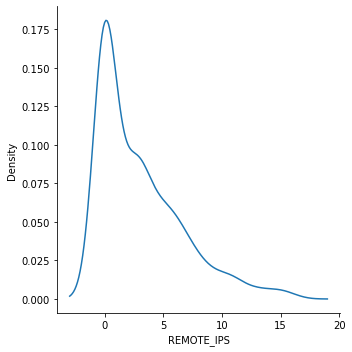

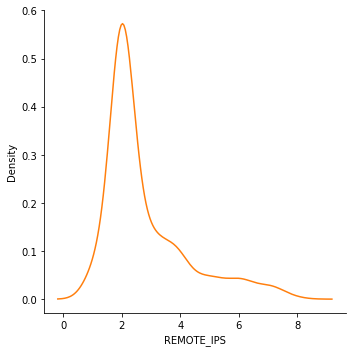

In [35]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"REMOTE_IPS",kind = 'kde')
plt.map(sns.violinplot,"type","REMOTE_IPS")

## App Bytes

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



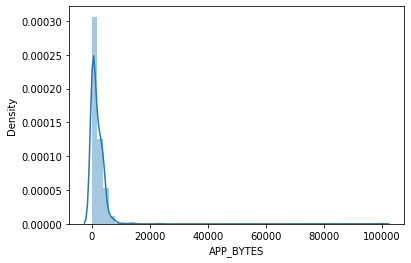

In [36]:
sns.distplot(X_smote['APP_BYTES'])


C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



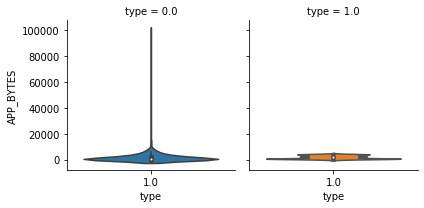

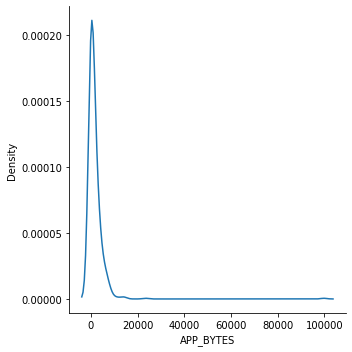

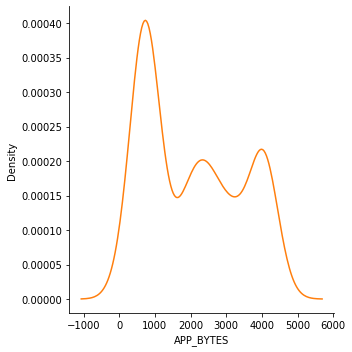

In [37]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"APP_BYTES",kind = 'kde')
plt.map(sns.violinplot,"type","APP_BYTES")

## Source APP Packets

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



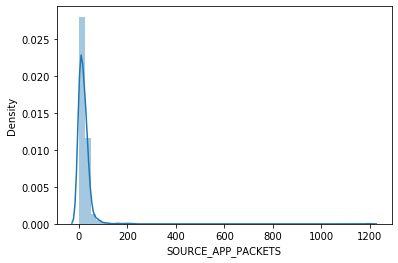

In [38]:
sns.distplot(X_smote['SOURCE_APP_PACKETS'])



C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



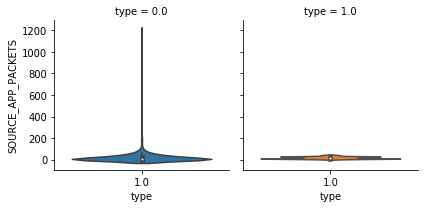

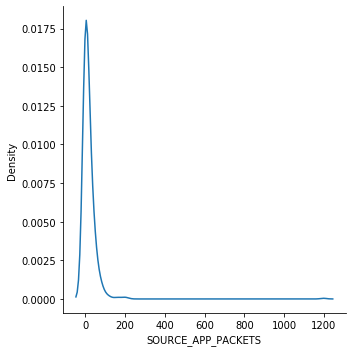

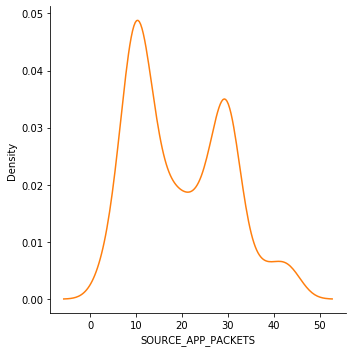

In [39]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"SOURCE_APP_PACKETS",kind = 'kde')
plt.map(sns.violinplot,"type","SOURCE_APP_PACKETS")

## Remote APP Packets

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



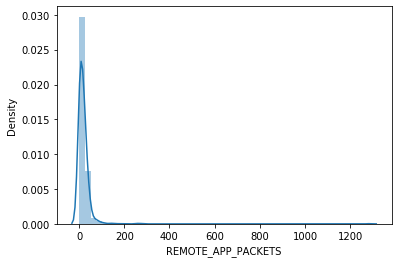

In [40]:
sns.distplot(X_smote['REMOTE_APP_PACKETS'])



C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



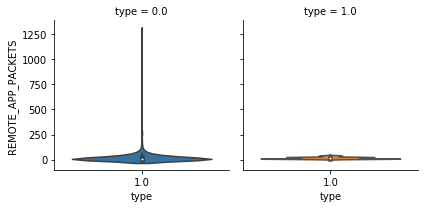

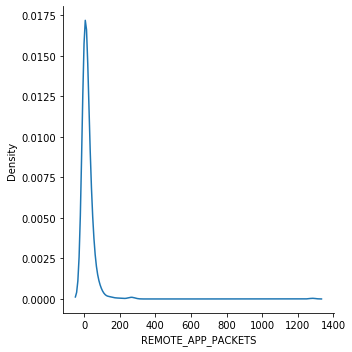

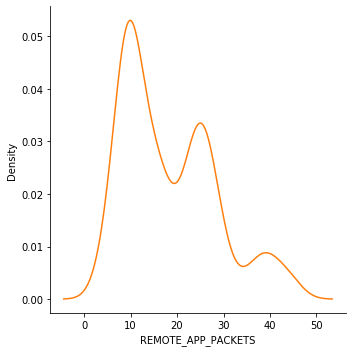

In [41]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"REMOTE_APP_PACKETS",kind = 'kde')
plt.map(sns.violinplot,"type","REMOTE_APP_PACKETS")

## Source APP Bytes

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



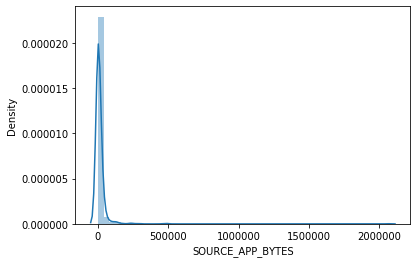

In [42]:
sns.distplot(X_smote['SOURCE_APP_BYTES'])


C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



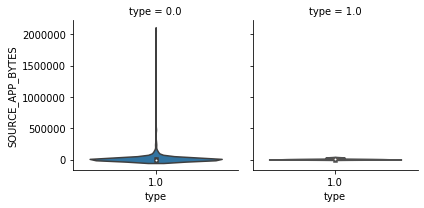

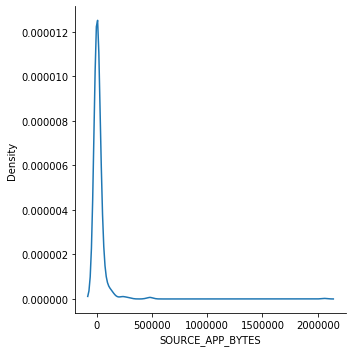

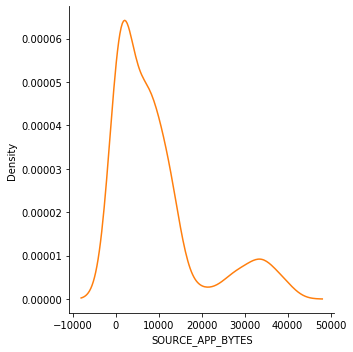

In [43]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"SOURCE_APP_BYTES",kind = 'kde')
plt.map(sns.violinplot,"type","SOURCE_APP_BYTES")

## Remote APP Bytes

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



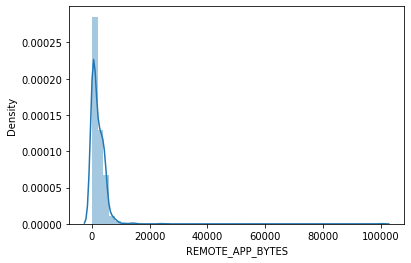

In [44]:
sns.distplot(X_smote['REMOTE_APP_BYTES'])



C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



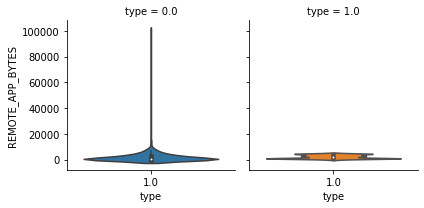

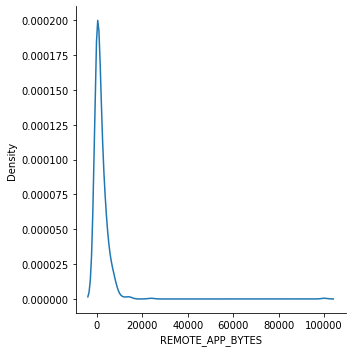

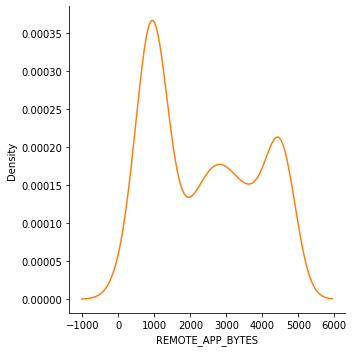

In [45]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"REMOTE_APP_BYTES",kind = 'kde')
plt.map(sns.violinplot,"type","REMOTE_APP_BYTES")

## APP Packets

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



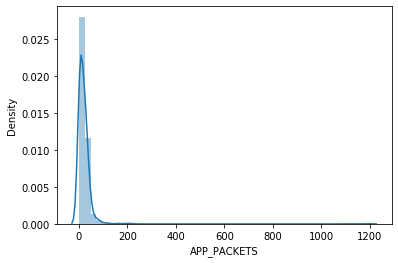

In [46]:
sns.distplot(X_smote['APP_PACKETS'])



C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



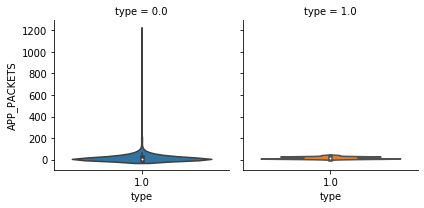

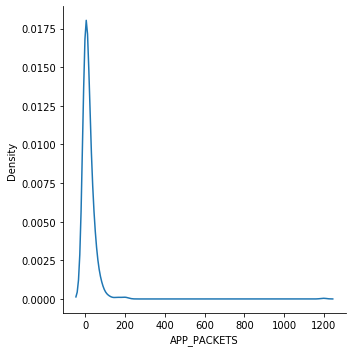

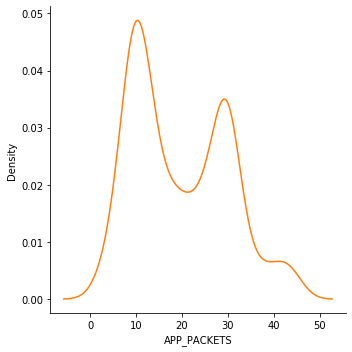

In [47]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"APP_PACKETS",kind = 'kde')
plt.map(sns.violinplot,"type","APP_PACKETS")

## DNS Query Times

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



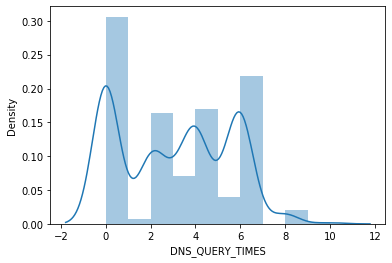

In [48]:
sns.distplot(X_smote['DNS_QUERY_TIMES'])



C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning:

Using the violinplot function without specifying `order` is likely to produce an incorrect plot.



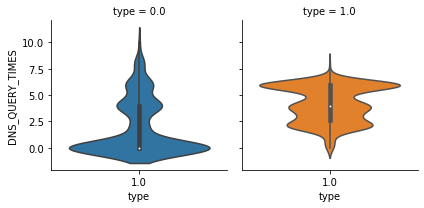

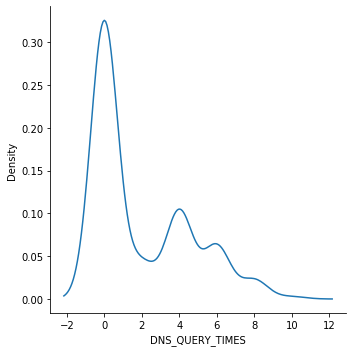

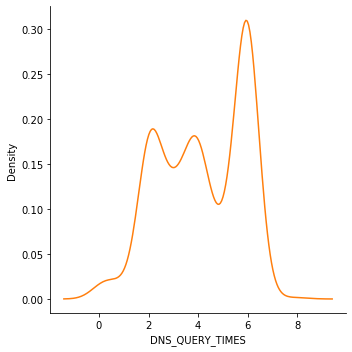

In [49]:
plt = sns.FacetGrid(X_smote,col = 'type',hue = 'type')
plt.map(sns.displot,"DNS_QUERY_TIMES",kind = 'kde')
plt.map(sns.violinplot,"type","DNS_QUERY_TIMES")

## Categorical Features

In [315]:
X_smote.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'type'],
      dtype='object')

## Server

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



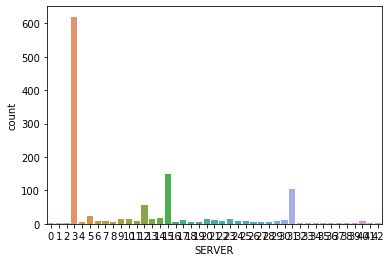

In [51]:
sns.countplot(X_smote['SERVER'])

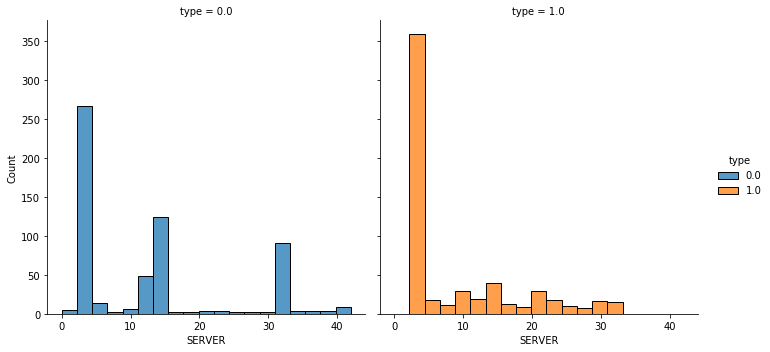

In [52]:
sns.displot(X_smote,x ='SERVER',col = 'type',hue = 'type')

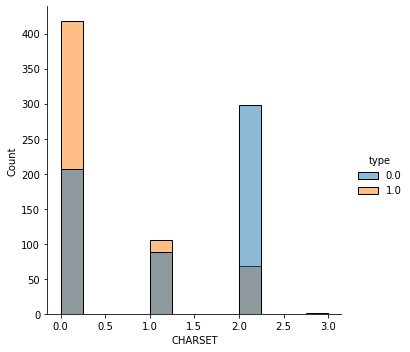

In [53]:
sns.displot(X_smote,x ='CHARSET',hue = 'type')

## Charset

C:\Users\Pavithra\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



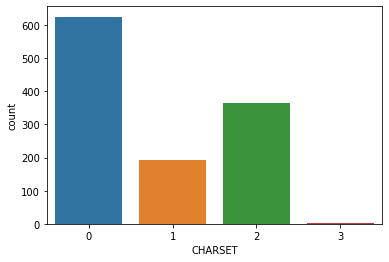

In [54]:
sns.countplot(X_smote['CHARSET'])


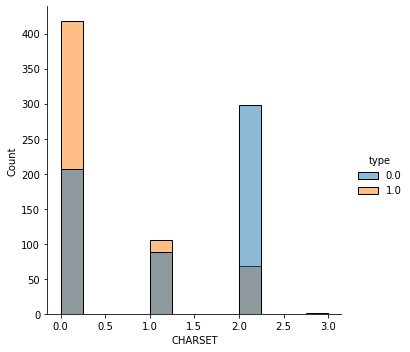

In [55]:
sns.displot(X_smote,x ='CHARSET',hue = 'type')

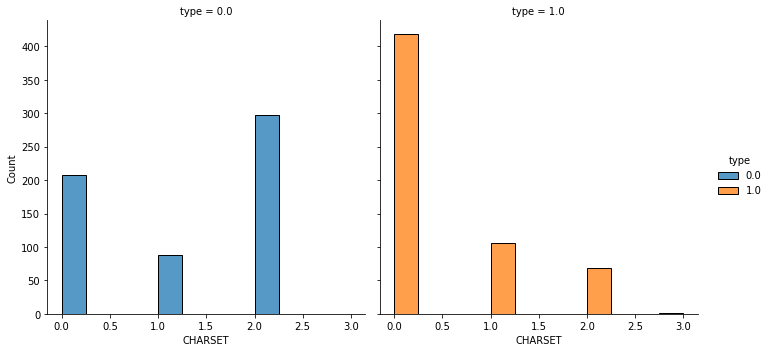

In [56]:
sns.displot(X_smote,x ='CHARSET',hue = 'type',col = 'type')

# Classification

In [450]:
X_smote.drop(['type'], axis=1, inplace=True)
X_smote.columns

Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES'],
      dtype='object')

### Train-Test Split

In [451]:
def split(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    return (X_train, X_test, y_train, y_test)

### XG Boost Classifier

In [452]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import export_graphviz

In [453]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = split(X_smote, y_smote)
def binary_classification_accuracy(actual, pred):
    
    print(f'Confusion matrix: \n{confusion_matrix(actual, pred)}')
    print(f'Accuracy score: \n{accuracy_score(actual, pred)}')
    print(f'Classification report: \n{classification_report(actual, pred)}')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


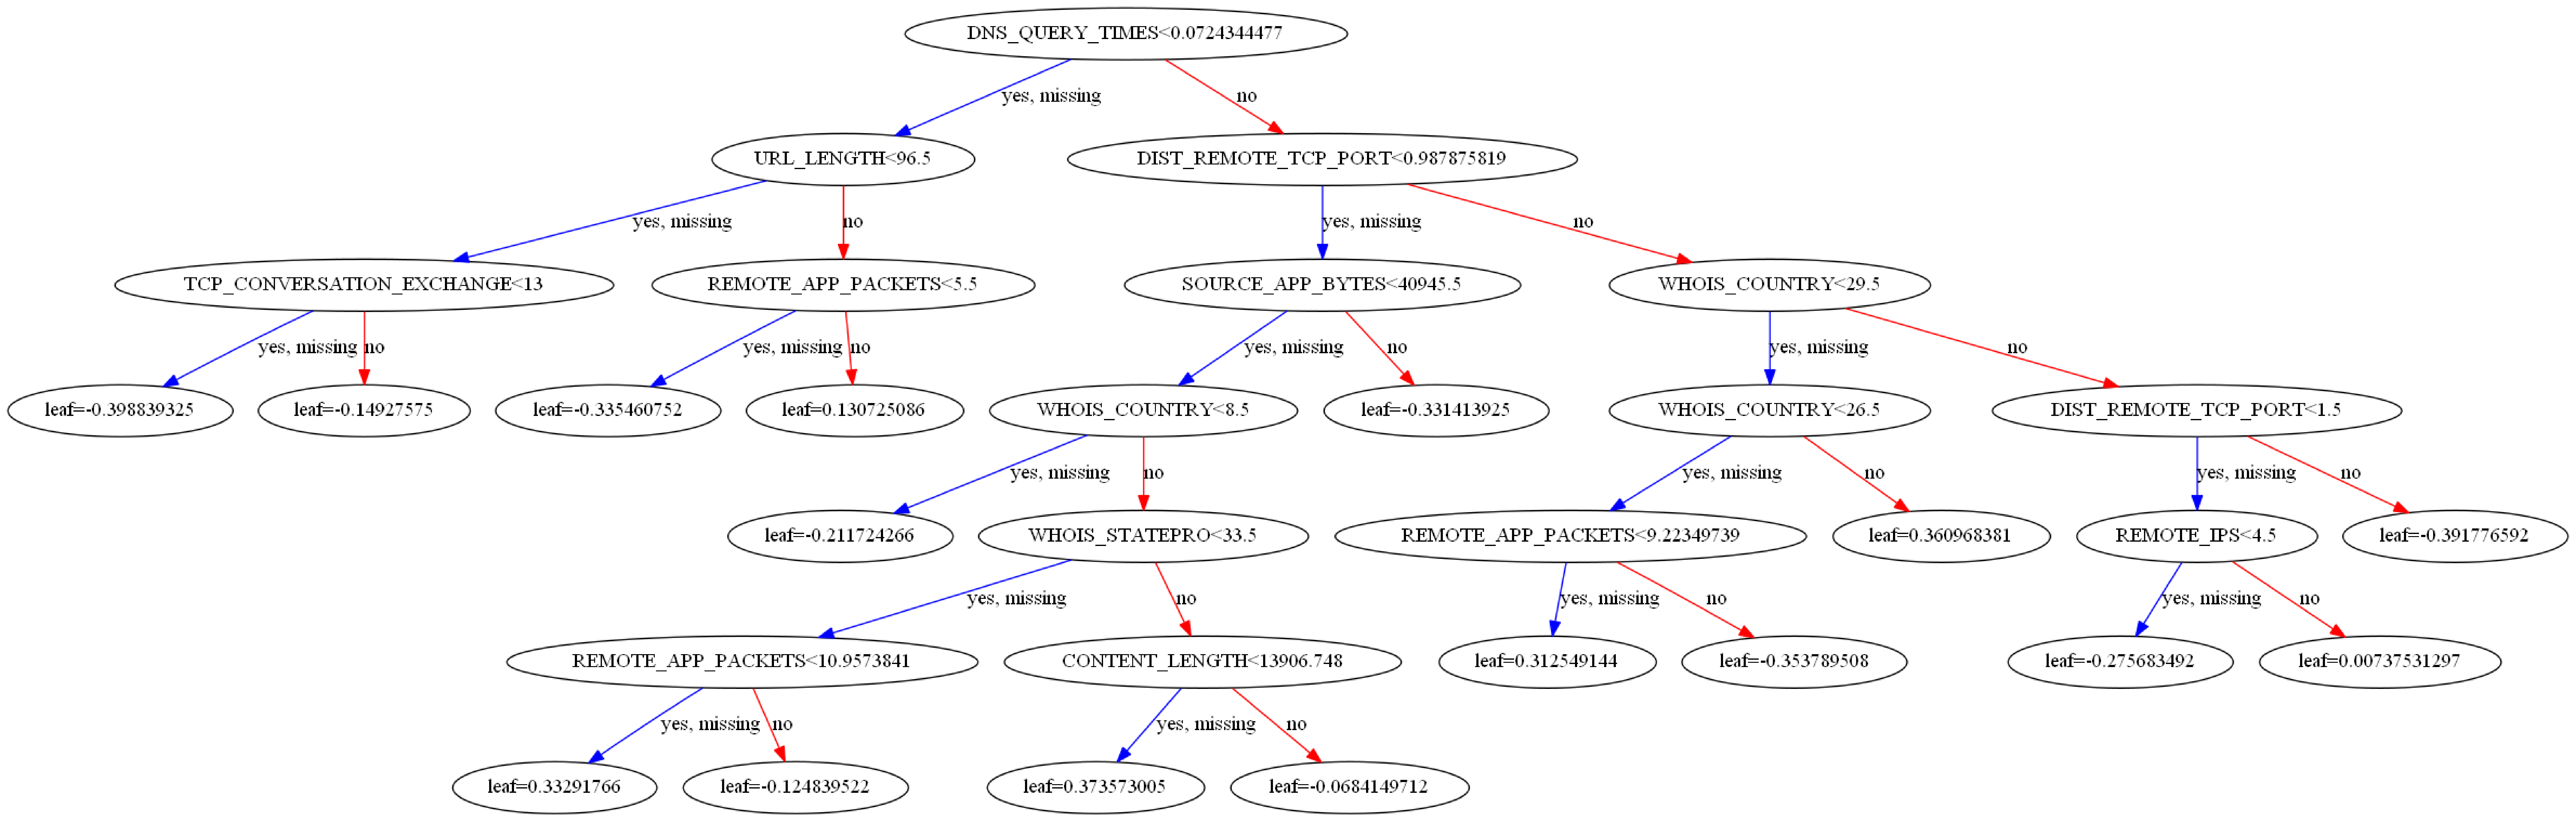

In [454]:
from xgboost import plot_tree
from sklearn import tree
import graphviz 
import pydot
import pydotplus


model = XGBClassifier()
model.fit(X_train, y_train)
print(model)

plot_tree(model, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree1.png')

In [456]:

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
binary_classification_accuracy(y_test, predictions)

Confusion matrix: 
[[122   2]
 [  1 113]]
Accuracy score: 
0.9873949579831933
Classification report: 
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       124
         1.0       0.98      0.99      0.99       114

    accuracy                           0.99       238
   macro avg       0.99      0.99      0.99       238
weighted avg       0.99      0.99      0.99       238



AUC Score:  0.987549518958687


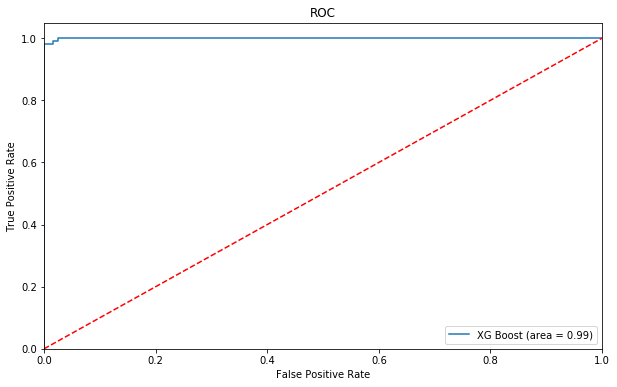

In [457]:
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print("AUC Score: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='XG Boost (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Random Forest Classifier

In [477]:
X_train, X_test, y_train, y_test = split(X_smote, y_smote)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
# Train
model.fit(X_train, y_train)
predictions = model.predict(X_test)
# Extract single tree

In [478]:

import pydot
estimator = model.estimators_[5]

target = ['0', '1']
export_graphviz(estimator, out_file = 'tree.dot', feature_names = X_train.columns, rounded = True, precision = 1, filled=True)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [479]:
binary_classification_accuracy(y_test, predictions)

Confusion matrix: 
[[120   3]
 [  2 113]]
Accuracy score: 
0.9789915966386554
Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       123
         1.0       0.97      0.98      0.98       115

    accuracy                           0.98       238
   macro avg       0.98      0.98      0.98       238
weighted avg       0.98      0.98      0.98       238



AUC Score:  0.958784022622835


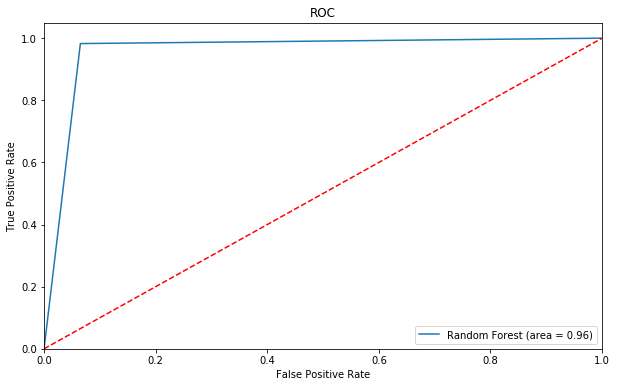

In [480]:
logit_roc_auc = roc_auc_score(y_test, estimator.predict(X_test))
print("AUC Score: ",logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, estimator.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Logistic Classifier

In [474]:
X_train, X_test, y_train, y_test = split(X_smote, y_smote)
normalized_train = preprocessing.normalize(X_train)
normalized_test = preprocessing.normalize(X_test)

from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression()
logistic_regression.fit(normalized_train,y_train)
y_pred=logistic_regression.predict(normalized_test)


In [475]:
binary_classification_accuracy(y_test, y_pred)

Confusion matrix: 
[[ 80  39]
 [  2 117]]
Accuracy score: 
0.8277310924369747
Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.67      0.80       119
         1.0       0.75      0.98      0.85       119

    accuracy                           0.83       238
   macro avg       0.86      0.83      0.82       238
weighted avg       0.86      0.83      0.82       238



0.5168067226890756


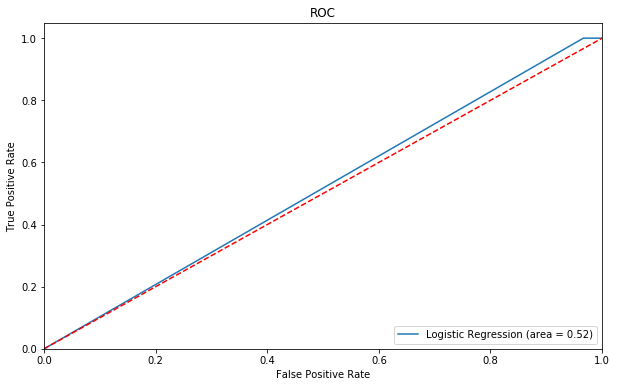

In [476]:
logit_roc_auc = roc_auc_score(y_test, logistic_regression.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logistic_regression.predict_proba(X_test)[:,1])

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()